<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#**Predição de Evasão de Clientes em Empresas de Telecomunicações**


---

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_a558eaed78994bcb94f2c0e83f5722ff~mv2.jpg"></p>


Empresas prestadoras de serviços comunicação costumam usar análises de insatisfação de cliente, identificando sempre se seus clientes estão confirmados ou não, essas análises são umas das principais métricas para manter e adquirir novos compradores. Em geral, as empresas desses setores costumam ter agências de atendimento ao cliente, onde uma das suas principais tarefas é tentar reconquistar aqueles clientes perdidos, os quais podem custar muito mais do que clientes novos.

Devido a isso, as empresas investem em nova tecnologias para fazer essas análises, estas comummente utilizam-se do *Churn rate*, ou simplesmente *Churn*, que é uma das formas de medir essa taxa de evasão dos clientes, 
Além de identificar essa taxa de evasão, o *Churn* auxiliar a identificar futuros cancelamento, realizando uma predição que auxilia na tomada de decisão e promoção de ações diferenciadas para estes clientes. Uma aplicação cotidiana nossa são nas empresas de streaming como Spotifly e Netflix. 

Por ser uma métrica tão importante, o Carlos Melos no seu curso Data Science na prática nos passou um desafio, implementar do zero uma solução de Churn para uma empresa de telecomunicação, utilizando-se de dados reais.


## Aquisição dos Dados e importação das bibliotecas



Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), tratam-se de um típico problema das companhias de telecomunicações.  Você pode ver o *dataset* completo [neste link](https://raw.githubusercontent.com/jvataidee/MachineLearning/master/dados/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Mesmo não havendo informações explícitas disponibilizadas pela IBM, os nomes das colunas permitem um entendimento a respeito do problema.

**Falar sobre os dados**

In [1]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [2]:
#importar bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas de modelagem
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning

#Bibliotecas de modelos
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


# configurar a visualização
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# importar os dados
df = "https://raw.githubusercontent.com/jvataidee/MachineLearning/master/dados/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(df)

# ver as 5 primeiras entradas

print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A visualização dessas 5 primeiras entradas permite a notar a composição do nosso *dataset*, mesmo que este não apresente uma definição oficial de cada coluna. O *dataset* apresenta 7042 entradas com 21 colunas.

## Análise Exploratória 
 

Como forma de avalisar a qualidade do *dataset*, comecei pela análise dos dados ausentes, este que indica se poderemos dá continuidade ao projeto ou não




In [4]:
#Calcular valores únicos
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

O cálculo dos valores únicos indicaram que, a coluna  `customerID`apresenta um valor unico para cada cliente, `Churn`indica a situação de cada cliente. Proximo passo irei verifiar qual a situação dos dados em relação ao tipo.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Veja que a camada  ` TotalCharges`está apresentando um tipo object (*String*), desta forma irei converter para *Float*, pois se trata de um valor não inteiro.

In [6]:
#Função para converter em float
def converter_float(entrada):
    try:
        return float(entrada)
    except ValueError:
        return np.nan

In [7]:
#Converter para float
df["TotalCharges"] = df["TotalCharges"].apply(converter_float)

In [8]:
#Porcentagem de dados ausentes
df.isnull().sum()/df.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

Após o calculo podemos ver que esse *dataset* já está limpo, apresentando somente dados ausente na camda Total Charges. O proximo passo é efetuar a substituição dos valores ausentas da camada `TotalCharges` para a média dessas e então recalcular dentre essas culunas quais apresentam valores únicos.

In [9]:
#Calcular média do TotalCharges
TotalChargesMedian = df.TotalCharges.median()

#Subistituir nan pela média
df["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Agora, irei realizar uma copia do *dataset*, descartar a coluna ` customerID ` e então da inicio a estatistica descritiva.

In [10]:
#Conpiar dados
df_new = df.copy()

df_new = df_new.drop(['customerID'], axis = 1)

In [11]:
df_new.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


A estatistica descritiva, não apresentou nenhum indicio de presença de outlier, sendo então necessário plotar o boxplot das camadas `TotalCharges`e `MonthlyCharges`.


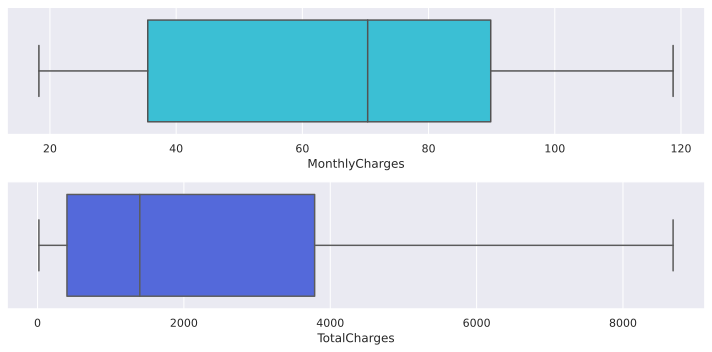

In [12]:
#Plotar os bocplots

fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize =(10,5))

sns.boxplot(df_new.MonthlyCharges, ax= ax[0], color = '#22d1ee')
sns.boxplot(df_new.TotalCharges, ax= ax[1], color = '#3d5af1')

plt.tight_layout()
plt.show()

Mesmo com o boxplot não foi possível ideintificar  a presença de *outlier*. Dando continuiadade a análise exploratória, vou verificar a camada `Tenure`, tal variável representa o tempo que cada cliente utilizou o serviço, podendo mostra a "fidelidade de serviço".

Assumindo que a unidade de tempos da camada `Tenure`é em meses.



In [13]:
#Criar dataset tenure e ordenas
df_tenure = df_new.tenure.value_counts()
df_tenure = df_tenure.sort_index()

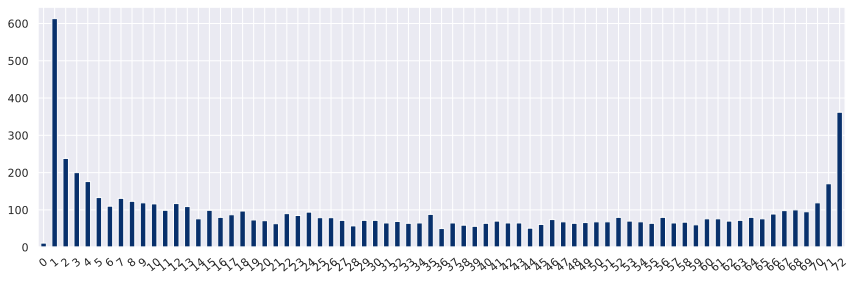

In [14]:
#Plotar tempo de serviço utilizado
df_tenure.plot(kind = 'bar', figsize = (12,4), cmap = "Blues_r")

plt.xticks(rotation = 40)

plt.tight_layout()
plt.show()

Note que, o tempo de serviço utilizado apresenta uma queda do primeiro més para os demais, com uma sumida nos ultimos meses de 70 a 72.

Agora analisando a existencia de vieses (Bias) no nosso *dataset*, vou verificar algumas relações de contagem, `gender` o genero, `Churn` a taxa de rotatividade, `Partner` a existencia de parceiros e os serviços utilizados.

In [15]:
#Contando por generos
df_gender = df_new.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64
Male      50.47565
Female    49.52435
Name: gender, dtype: float64



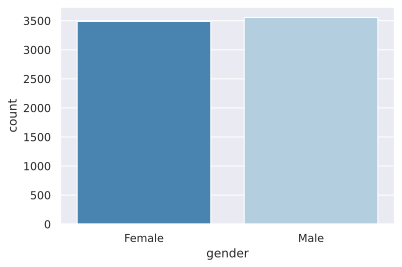

In [16]:
#Balanceamento de generos no dataset
print(df_gender)
print(df_gender/df_new.shape[0]*100)
print()

sns.countplot(df_new.gender,palette = 'Blues_r');

Analisando o gráfico acima podemos ver que os dados de generos estão balanceados, possuindo pouca diferença entre eles.

In [17]:
#Contando por churn
df_taxa = df_new.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64



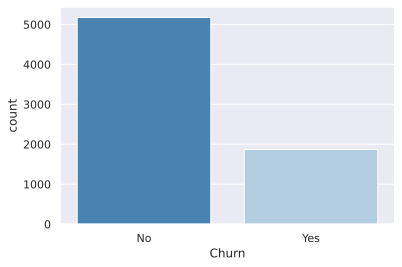

In [18]:
#Balanceamento do churn
print(df_taxa)
print(df_taxa/df_new.shape[0]*100)
print()

sns.countplot(df_new.Churn,palette = 'Blues_r');

Analisando o balanceamento das taxas, pode-se ver que estes não estão balanceados. Tendo então 73,5% para não e 26,5% para sim. Desta forma, será necessário o procedimento de balancemanto, na proximo etapa.

In [19]:
#analisando as parcerias
df_parcer = df_new.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64



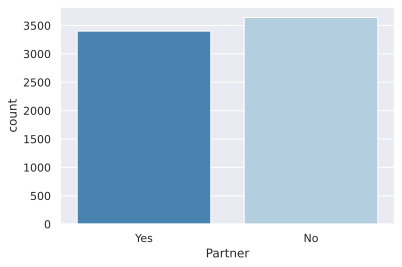

In [20]:
print(df_parcer)
print(df_parcer/df_new.shape[0]*100)
print()

sns.countplot(df_new.Partner,palette = 'Blues_r');

Analisando os dados de parcerias, esses apresentaram-se balanceados. Tendo em visto essas analisas feitas anteriormente, posso então identificar os tipos de serviços oferecidos.

In [21]:
#Separando dataset  de serviços
df_service = df_new.iloc[:,5:14]

In [22]:
#Mostrar os tipos de serviço
print(np.unique(df_service.select_dtypes('object').values))

['DSL' 'Fiber optic' 'No' 'No internet service' 'No phone service' 'Yes']


Como estamos lindando com um problema de cariáveis categórica, é se insuma importancia analisar os valores únicos, tal análise permite identificar as situações das camadas diferente apresentarem a mesma coisa.

Para a análise dos serviços, podemos utilizar esses valroes únicos apresentados acima como sendo a mesma coisa. Apesar desta hipotese ser completamente válida, para o trabalho aqui em questão irei utilizalos como variáveis únicas.

###Preparação dos dados

Neta etapa irei realizar algumas maniputações, para preparação dos dados para construção de um bom modelo. Primeiro realizare o pre-processamento, utilizando o algoritimo LabelEcoder, para transformar em variáveis binária, deixando cada classe em uma camada diferente.

In [23]:
#Copiar o dataset
df_model = df_new.copy()

In [24]:
#Identificar binários das colunas
binary = df_model.nunique()[df_model.nunique() == 2].keys().tolist()

#Identificar número de variáveis para cada coluna
numb_val = [col for col in df_model.select_dtypes(['int', 'float']).columns.tolist() if col not in binary]

#Identificar colunas com mais de uma variáveis categoricas
val_cate = [col for col in df_model.columns.tolist() if col not in binary + numb_val]

In [25]:
#Ecoding o dataset
label = LabelEncoder()

for i in binary:
  df_model[i] = label.fit_transform(df_model[i]) 

Com esse primeiro processamento foi possível realizar o ecoding das camadas com apenas dois valores categoricos. Assim, será necessário realizar outro processamento.

In [26]:
#Ecoding para mais de duas variavel categorica
df_model = pd.get_dummies(df_model, columns = val_cate)

Com as variáveis já processadas, podemos ver um sumarios de todas elas. 

In [27]:
df_model.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


E calcular a matriz de correlação.

In [28]:
#Criando uma mascara da diagonal superior
mask = np.zeros_like(df_model.corr())
mask[np.triu_indices_from(mask)] = True

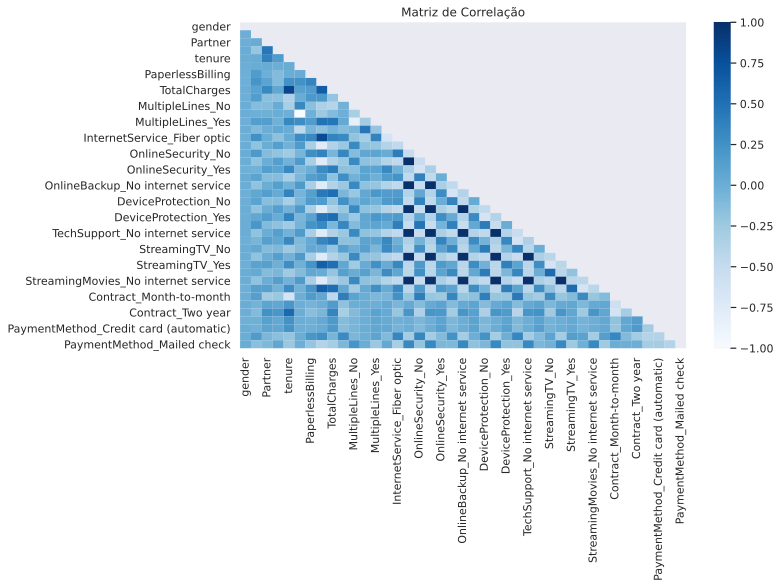

In [29]:
#Plotar matriz de correlação
plt.figure(figsize = (10,6))
plt.title("Matriz de Correlação")

sns.heatmap(df_model.corr(), mask= mask, cmap = 'Blues' )
plt.show()

Com isso é possivel ver que os dados agora númericos, apresentam um valor alto e positivo de coorelação.

Com todos os processos realizados anteriormente, podemos dá inicio a criação de nosso modelo, no qual irei inicar pela separação dos valores de *feature matrix* da *target vector*, além da base de treino e teste.

In [30]:
#Separa valores de feature matrix da target vector
X = df_model.drop("Churn", axis = 1)
y = df_model["Churn"]

In [31]:
# dividir entre treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

##Construção do modelo

###Métrica de peformace

A base de teste será somente utilizada no final, assim utilizarei o algoritimo de cross-validation para estimar o erro da linha base e dos modelos iniciais, utilizando a métricar de [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall) para avaliar qual melhor modelo.

O método Recall, utiliza-se da matriz de confusão a partir da seguinte equação:

$$
  \frac{TP}{TP+FN}
$$

Onde, 
</p>
TP - Positivo Verdadeiro </p>
FN -  Falso Negativo

Para calcular o erro, utilizarei cross-validation para estimar o erro da baseline e dos modelos iniciais, sobre o cross-validation abordei esse em um artigo em meu[ blog](https://www.joaoataide.com/post/previs%C3%A3o-de-s%C3%A9ries-temporais-com-o-prophet).


In [41]:
#Função de validação

def valid(X, y, model, quite = False):

  X = np.array(X)
  y = np.array(y)
  pipeline = make_pipeline(StandardScaler(), model)
  scores = cross_val_score(pipeline, X, y, scoring="recall")

  if quite == False:
     print("Recall: {:.3f} (+/- {:.3f})".format(scores.mean(), scores.std()))

  return scores.mean()

Para o linha base inicial, usarei o *Random Forest*, sem nenhum tipo de alteração nos parâmetros. Os dados que serão passados são os de treino.

In [43]:
#Criando linha base
rfc = RandomForestClassifier()
score_baseline = valid(X_treino, y_treino, rfc)

Recall: 0.515 (+/- 0.031)


Uma vez com a *baseline* de comparação pronta pode-se avaliar os modelos, as quais tera melhor ou pior resultado. 

A técnica escolhida foi [*Under Sampling*](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/#:~:text=Undersampling%20refers%20to%20a%20group,has%20a%20skewed%20class%20distribution.), após alguns teste de desempenho das outras. Seguindo recomendações de algumas literaturas, os dados serão padronizados antes de usar essa técnica de balanceamento.

Com a base de teste e treino já separada, podemos da início ao balancemaneto e padronização. No qual só pode ser efetuado na base de treino para não ocorrer o enviesamento dos modelos.

In [46]:
#Padronização das escalas
scala = StandardScaler()
scala.fit(X_treino)

#Balanceamento dos dados
rus = RandomUnderSampler()
X_treino_rus, y_treino_rus = rus.fit_sample(X_treino,y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##Qual melhor modelo?

Como não sei qual modelo vai apresentar o melhor resultado, irei realizar a validação cruzada para os seguinte modelos:

* Floresta aleatória 
* Árvores de Decisão
* Gradiente Descendente Estocástico
* SVC
* Regressão Logística
* LightGBM

In [58]:
#Intanciar os modelos
rc = RandomForestClassifier()
ad = DecisionTreeClassifier()
gde = SGDClassifier()
svc = SVC()
rl = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [74]:
#Criar lista para resultados
modelo = []
recall = []

In [75]:
#Avaliar desempenho
for clf in (rc, ad, gde, svc, rl, xgb, lgbm):
  modelo.append(clf.__class__.__name__)
  recall.append(valid(X_treino_rus, y_treino_rus, clf, quite = True))

Recall = pd.DataFrame(data = recall, index=modelo, columns=["Recall"])

In [80]:
Recall = Recall.sort_values(by="Recall", ascending=False)

                          Recall
XGBClassifier           0.816563
LogisticRegression      0.803123
SVC                     0.800990
RandomForestClassifier  0.774806
LGBMClassifier          0.767000
SGDClassifier           0.736626
DecisionTreeClassifier  0.679884



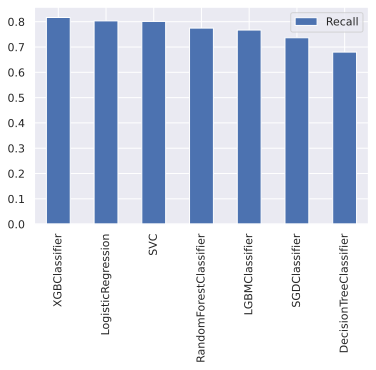

In [85]:
print(Recall)
print()
Recall.plot(kind = "bar");

Podemos ver nos resultados, resaltaram-se os resultados dos modelos XGBoost, Regressão Logistica e SVC qua no entanto tiveram os suas instância em *default*. Com isso, pegarei o melhor modelo anterior (XGBoost) e modedificarei seus parâmetros procurando o melhor resultado possível.

In [ ]:
xgb1 = XGBClassifier(learning_rate = 0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_treino_rus, y_treino_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_treino_rus, y_treino_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_treino_rus, y_treino_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

In [ ]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_treino_rus, y_treino_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

###Predições e Matriz de confusão

##Conclusão

Neste projeto, trabalhamos em um problema de previsão de churn em que o objetivo principal era construir um modelo de aprendizado de máquina capaz de identificar corretamente o maior número possível de clientes churning. Para tanto, percorremos as seguintes etapas: Análise exploratória dos dados; Limpeza de dados Análise de dados Preparação de dados Treinamento, ajuste e avaliação de modelos de aprendizado de máquina. Como resultado, temos dois modelos que apresentaram resultados bastante satisfatórios. Podemos então considerar que o objetivo do projeto foi cumprido. Se você tiver alguma dúvida, sugestão ou feedback, sinta-se à vontade para entrar em contato comigo através do GitHub ou Linkedin.